## Import the relevant libraries

In [ ]:
from sklearn.datasets import load_digits
#Load and return the digits dataset (classification).
#Each datapoint is a 8x8 image of a digit.
import numpy as np

## Load datasets

In [ ]:
digits= load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


## Exploratory Data Analysis

In [ ]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [ ]:
print(type(digits.images))
print(digits.images.shape)

<class 'numpy.ndarray'>
(1797, 8, 8)


#This shows that the image array is a NumPy array with 1797 image samples. Each image
sample is 8 pixels wide and 8 pixels high.

In [ ]:
#Let’s print our pixel values for the image at index 7.
print(digits.images[24])

[[ 0.  0.  0.  0. 12.  2.  0.  0.]
 [ 0.  0.  0.  6. 14.  1.  0.  0.]
 [ 0.  0.  4. 16.  7.  8.  0.  0.]
 [ 0.  0. 13.  9.  0. 16.  6.  0.]
 [ 0.  6. 16. 10. 11. 16.  0.  0.]
 [ 0.  0.  5. 10. 13. 16.  0.  0.]
 [ 0.  0.  0.  0.  6. 16.  0.  0.]
 [ 0.  0.  0.  0. 12.  8.  0.  0.]]


#Let’s plot the minimum and maximum values for the pixels in our image.

In [ ]:
print(np.min(digits.images[24]))
print(np.max(digits.images[24]))

0.0
16.0


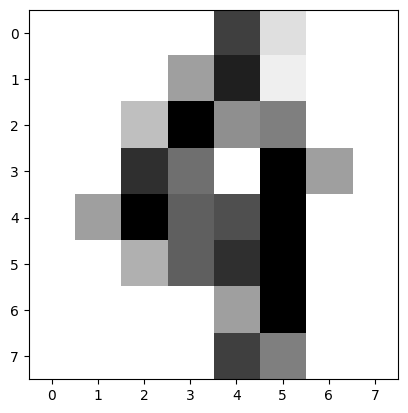

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[24],cmap='binary')

In [ ]:
#Shape of our target array containing our image labels.
print(type(digits.target))
print(digits.target.shape)

<class 'numpy.ndarray'>
(1797,)


In [ ]:
print(digits.target[24])

4


## Preprocessing Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(x_train)
Xtest = sc.transform (x_test)
print(np.mean(Xtrain))
print(np.std(Xtrain))

-4.780470336173651e-18
0.976281209488332


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42).fit(Xtrain, y_train)
predictions = log_reg.predict(Xtest)

## Performance Matrices

In [ ]:
# Use score method to get accuracy of model
score = log_reg.score(Xtest, y_test)
print(score)

0.9711111111111111


In [ ]:
single_test = digits.images[23].reshape(1,-1)
prediction = log_reg.predict(single_test)
print(prediction[0])
print(prediction)

3
[3]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  1  0  0  2  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 56  1  0  0  2]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  0  0  0  0  1  0  0 37  0]
 [ 0  0  0  1  0  0  0  0  1 46]]


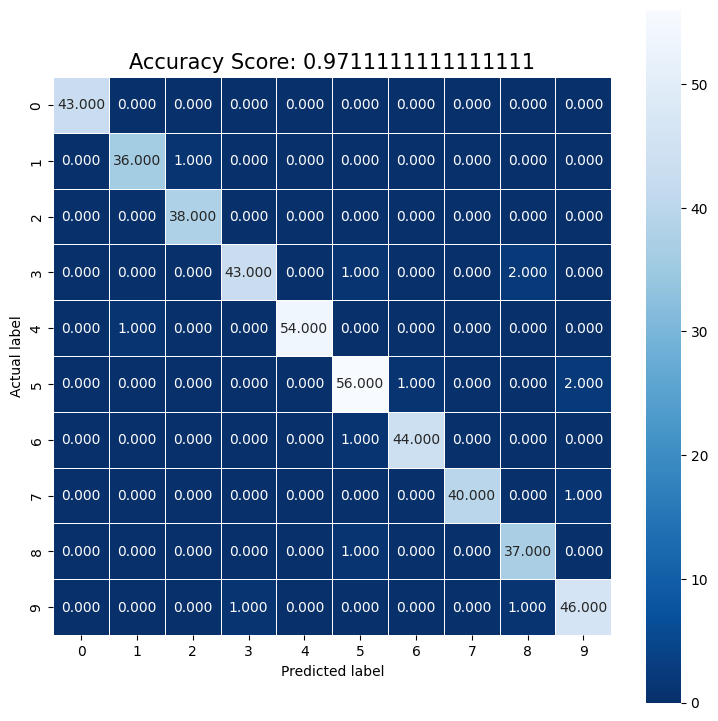

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
from PIL import Image
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
img = Image.fromarray(digits.images[25],'L')
img.save('my1.png')

In [ ]:
img_T = cv.imread('/content/my1.png')
image = cv.cvtColor(img_T, cv.COLOR_BGR2GRAY)
plt.imsave('my2.png',image)
i=cv.imread('/content/my2.png')
cv2_imshow(image)

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(log_reg,open('/content/drive/My Drive/image_classification_model.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [ ]:
!pip install streamlit==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 116.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 133.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=339ed5b7ba0f77218477da4adcee4c444643b8fec68cf06c99065057172e696c
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Un

In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 45.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=bce60612ae8476ce7cdf5e52c40806dd0a47adc6596252c563eb474fd589d4c2
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
!ngrok authtoken 1oEm0wopEJyjrT38ULluwUKK5fq_7ai4ZocZJ2YuFuoiJfoMh

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
from werkzeug.utils import secure_filename
st.set_option('deprecation.showfileUploaderEncoding', False)
# Loading saved model from Drive.
pickle_in = open("/content/drive/MyDrive/model.pkl","rb")
model= pickle.load(pickle_in)

html_temp = """
    <div class="" style="background-color:blue;">
    <div class="clearfix">
    <div class="col-md-12">
    <center><p style="font-size:40px;color:white;margin-top:10px;">NSP project on image classification</p></center>
    <center><p style="font-size:40px;color:white;margin-top:10px;">Artificial Intelligence & Data Science </p></center>
    </div>
    </div>
    </div>
    """
st.markdown(html_temp,unsafe_allow_html=True)
st.title("""
        Digit Recognition
         """
         )
file= st.file_uploader("Please upload image", type=("jpg", "png"))

import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data):
  single_test = image_data[:, :, 0]
  single_test = single_test.reshape(1,-1)
  prediction = model.predict(single_test)
  print(prediction[0]) 
  #image_resized = cv2.resize(image_data, (8, 8))  
  #prediction = model.predict(image_resized.reshape(1,-1))
  #print('Prediction Score:\n',prediction[0])
  #thresholded = (prediction>0.5)*1
  #print('\nThresholded Score:\n',thresholded[0])
  #print('\nPredicted Digit:',np.where(thresholded == 1)[1][0])
  #digit = np.where(thresholded == 1)[1][0]
  #st.image(image_data, use_column_width=True)
  return prediction
if file is None:
  st.text("Please upload an Image file")
else:
  image=Image.open(file)
  image=np.array(image)
  #file_bytes = np.asarray(bytearray(file.read()), dtype=np.uint8)
  #image = cv2.imdecode(file_bytes, 1)
  st.image(image,caption='Uploaded Image.', use_column_width=True)
    
if st.button("Predict Digit"):
  result=import_and_predict(image)
  st.success('Model has predicted the image is of  {}'.format(result))
if st.button("About"):
  st.header("Rohan Kandpal")
  st.subheader("Student, Department of AI & DS")

html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12"> 
   <center><p style="font-size:20px;color:white;margin-top:10px;">Poornima Group of Institution</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Writing app.py


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

PyngrokNgrokHTTPError: ignored

In [ ]:
!streamlit run --server.port 80 app.py

2022-07-30 09:10:35.401 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.196.65.121:80

1
  Stopping...
^C
